В данном мини-проекте проведем анализ данных о покупках продукции. \
Данные имеют следующую структуру:

- записываются для каждого пользователя, совершившего покупки, каждый день;
- для каждой даты есть своя папка, внутри неё – папки для каждого пользователя;
- внутри каждой папки есть файл data.csv, где и хранятся данные.

In [1]:
import pandas as pd
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = 'C:/Users/yarus/projects/data/'

In [3]:
df=pd.DataFrame()

for date in os.listdir(path):
    for name in os.listdir(path + date):
        file_path = f'{path}{date}/{name}/data.csv'
        df_1 = pd.read_csv(file_path, sep = ',', index_col = 0)
        df_1['name'], df_1['date'] = name, date
        df = pd.concat([df, df_1]).reset_index().drop('index', 1)
df.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


Выясним какие пользователи купили больше всего товаров.

In [4]:
df_purchases = df.groupby('name').quantity.sum()
max_purchases = df_purchases.max()
df_purchases.loc[df_purchases == max_purchases]

name
Alexey_Smirnov    52
Petr_Smirnov      52
Name: quantity, dtype: int64

По 52 покупки совершили Смирнов Алексей и Смирнов Петр.

Найдем топ-10 товаров по числу проданных единиц за всё время и построим барплот.  \
ось x – идентификаторы товаров (product_id);  \
 ось y – суммарное число покупок (сколько товаров с таким product_id было продано).

In [5]:
df_sales = df.groupby('product_id', as_index=False).quantity.sum().sort_values('quantity', ascending=False).head(10)
df_sales

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


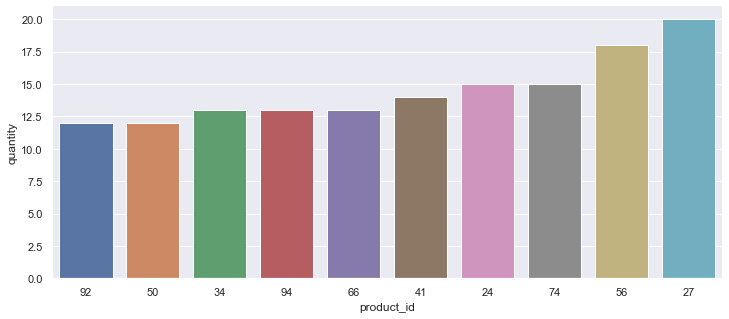

In [6]:
sns.set(rc = {'figure.figsize':(12,5)})
sns.barplot(data=df_sales, x='product_id', y='quantity', order=df_sales.sort_values('quantity').product_id)
sns.despine()

Визуализируем продажи по дням.  \
ось x – дни (date);  \
ось y – суммарное число покупок (сколько товаров с таким product_id было продано).

In [7]:
df_day_sales  = df.groupby('date', as_index=False).agg({'quantity' : 'sum'}).sort_values('quantity', ascending=False) 

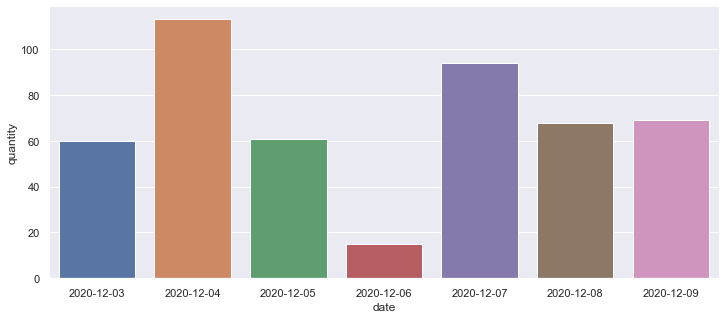

In [8]:
sns.set(rc = {'figure.figsize':(12,5)})
sns.barplot(data=df_day_sales, x='date', y='quantity', order=['2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', 
                                                              '2020-12-07', '2020-12-08', '2020-12-09'])
sns.despine()

Максимальное число товаров было продано 4 декабря. \
8 и 9 декабря было продано примерно одинаковое число товаров. \
4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день. \
Меньше всего товаров было приобретено 6 декабря.

Выясним сколько пользователей приобрели какой-либо товар повторно (более 1 раза). Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.

In [9]:
df_repeat_purchases = df.groupby(['name', 'product_id']).agg({'date': 'nunique'}).sort_values('date', ascending=False)
df_repeat_purchases.rename(columns = {'date': 'repeat_purchases'}).reset_index().head()

,name,product_id,repeat_purchases
0,Anton_Ivanov,15,2
1,Petr_Fedorov,94,2
2,Alexey_Fedorov,13,1
3,Petr_Smirnov,21,1
4,Petr_Petrov,64,1


Можно заметить, что таких пользователей всего два.